# Multi-Arm Bandit Algorithm : SoftMax

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Example : Guassian Reward Distribution 

### Trail 1

In [2]:
def softmax(H):
    prob_of_actions = np.exp(H)/np.sum( np.exp(H) )
    return prob_of_actions

In [3]:
def run_experiment_softmax(number_of_bandit, step_size, baseline, number_of_run, number_of_time_step):

    sum_of_rewards        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )
    
    for r in range(number_of_run):    
        q_true = np.random.normal(2,1,number_of_bandit)
        
        N_act = np.zeros( number_of_bandit )
        Q_act = np.zeros( number_of_bandit )
        
        time_step  = 0
        average_reward = 0
        
        list_of_actions = []
        list_of_rewards = []
        list_of_best_actions = np.zeros( number_of_time_step )
        
        for t in range(number_of_time_step):
            """Step 1: convert machine (action) values to the machine (action) probabilities"""
            prob_of_actions = softmax(Q_act)
            
            """Step 1: pick the machine (action) that has the highest preference"""
            A = np.random.choice(np.arange(number_of_bandit, dtype=int), p=prob_of_actions)
            
            """Step 2: Get a random reward from the corresponding reward distribution of that machine (action)"""
            reward = np.random.normal( q_true[A],1 )
            
            """Step 3: Update Q"""
            time_step += 1
            if baseline == True:
                average_reward += (reward - average_reward)/time_step
            else:
                average_reward = 0.0
            
            Q_act[A] += step_size * (reward - average_reward) * (1 - prob_of_actions[A])
            action_not_taken = np.arange(number_of_bandit) != A
            Q_act[action_not_taken] +=  -step_size * (reward - average_reward) * prob_of_actions[action_not_taken]
            
            
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            if A == np.argmax( q_true ):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
        
    average_reward         = sum_of_rewards /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, percent_of_best_action, count_of_actions

In [4]:
number_of_bandit    = 10
number_of_run       = 2000
number_of_time_step = 1000
step_size = [0.1]

average_reward_01, best_action_01, _ = run_experiment_softmax(number_of_bandit, step_size[0], True, 
                                                              number_of_run, number_of_time_step)
average_reward_02, best_action_02, _ = run_experiment_softmax(number_of_bandit, step_size[0], False, 
                                                              number_of_run, number_of_time_step)

(0.0, 3.6347898472405826)

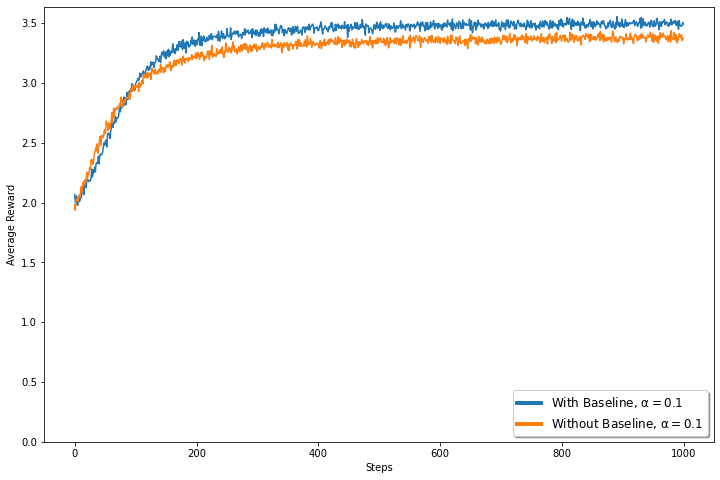

In [5]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_01, label =r'With Baseline, $\mathrm{\alpha}=0.1$')
plt.plot(average_reward_02, label =r'Without Baseline, $\mathrm{\alpha}=0.1$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(0.0, 100.0)

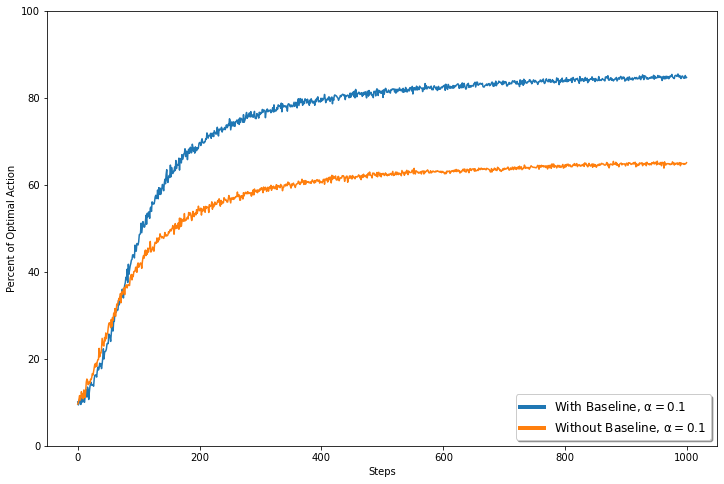

In [6]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_01, label =r'With Baseline, $\mathrm{\alpha=0.1}$') 
plt.plot(100*best_action_02, label =r'Without Baseline, $\mathrm{\alpha=0.1}$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
plt.ylim(ymin=0, ymax=101)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(np.arange(0,101,10), fontsize=12)

In [7]:
del run_experiment_softmax

### Trial 2

In [8]:
def softmax(H):
    prob_of_actions = np.exp(H)/np.sum( np.exp(H) )
    return prob_of_actions

In [9]:
def run_experiment_softmax(number_of_bandit, step_size, baseline, number_of_run, number_of_time_step):

    sum_of_rewards        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )
    
    for r in range(number_of_run):    
        q_true = np.random.normal(2, 1, number_of_bandit)
        
        H = np.zeros( number_of_bandit )
        time_step  = 0
        average_reward = 0
        
        list_of_actions = []
        list_of_rewards = []
        list_of_best_actions = np.zeros( number_of_time_step )
        
        for t in range(number_of_time_step):
            """Step 1: convert machine (action) values to the machine (action) probabilities"""
            prob_of_actions = softmax(H)
            
            """Step 1: pick the machine (action) that has the highest preference"""
            A = np.random.choice(np.arange(number_of_bandit, dtype=int), p=prob_of_actions)
            
            """Step 2: Get a random reward from the corresponding reward distribution of that machine (action)"""
            reward = np.random.normal( q_true[A],1 )
            
            """Step 3: Update preference"""
            time_step += 1
            
            if baseline == True:
                average_reward += (reward - average_reward)/time_step
            if baseline == False:
                average_reward = 0.0
                
            H[A] +=  step_size * (reward - average_reward) * (1.0 - prob_of_actions[A])
            action_not_taken = np.arange(number_of_bandit, dtype=int) != A
            H[action_not_taken] +=  -step_size * (reward - average_reward) * prob_of_actions[action_not_taken]
            
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            if A == np.argmax(q_true):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
        
    average_reward         = sum_of_rewards /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, percent_of_best_action, count_of_actions

In [10]:
number_of_bandit    = 10
number_of_run       = 2000
number_of_time_step = 1000

step_size = [0.1]

average_reward_01, best_action_01, _ = run_experiment_softmax(number_of_bandit, step_size[0], True, 
                                                              number_of_run, number_of_time_step)
average_reward_02, best_action_02, _ = run_experiment_softmax(number_of_bandit, step_size[0], False, 
                                                              number_of_run, number_of_time_step)

(0.0, 3.626810224084832)

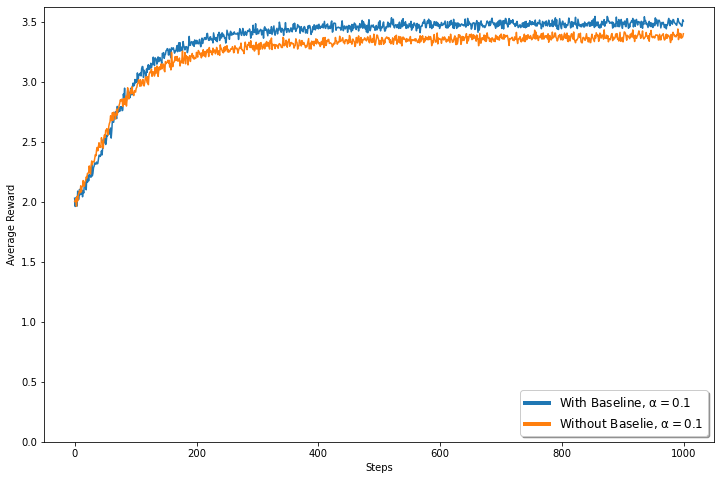

In [11]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_01, label =r'With Baseline, $\mathrm{\alpha}=0.1$')
plt.plot(average_reward_02, label =r'Without Baselie, $\mathrm{\alpha}=0.1$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(0.0, 100.0)

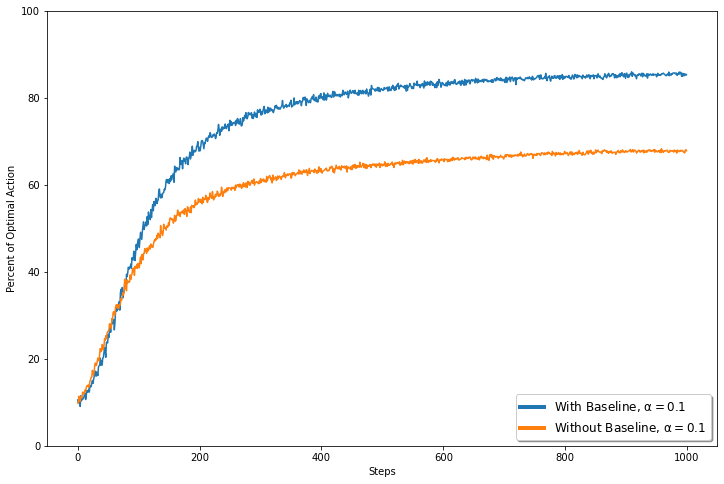

In [12]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_01, label =r'With Baseline, $\mathrm{\alpha=0.1}$') 
plt.plot(100*best_action_02, label =r'Without Baseline, $\mathrm{\alpha=0.1}$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
plt.ylim(ymin=0, ymax=101)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(np.arange(0,101,10), fontsize=12)

## Example : Bernoulli Reward Distribution 

In [13]:
def run_experiment_softmax(number_of_bandit, step_size, baseline, number_of_run, number_of_time_step):

    sum_of_rewards        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )
    
    for r in range(number_of_run):    
        q_true = np.random.uniform(0.1,0.5, number_of_bandit)
        
        H = np.zeros( number_of_bandit )
        time_step  = 0
        average_reward = 0
        
        list_of_actions = []
        list_of_rewards = []
        list_of_best_actions = np.zeros( number_of_time_step )
        
        for t in range(number_of_time_step):
            """Step 1: convert machine (action) values to the machine (action) probabilities"""
            prob_of_actions = softmax(H)
            
            """Step 1: pick the machine (action) that has the highest preference"""
            A = np.random.choice(np.arange(number_of_bandit, dtype=int), p=prob_of_actions)
            
            """Step 2: Get a random reward from the corresponding reward distribution of that machine (action)"""
            if np.random.random() <= q_true[A]:
                reward = 1
            else:
                reward = 0
            
            """Step 3: Update preference"""
            time_step += 1
            
            if baseline == True:
                average_reward += (reward - average_reward)/time_step
            if baseline == False:
                average_reward = 0.0
                
            H[A] +=  step_size * (reward - average_reward) * (1.0 - prob_of_actions[A])
            action_not_taken = np.arange(number_of_bandit, dtype=int) != A
            H[action_not_taken] +=  -step_size * (reward - average_reward) * prob_of_actions[action_not_taken]
            
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            if A == np.argmax(q_true):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
        
    average_reward         = sum_of_rewards /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, percent_of_best_action, count_of_actions

In [14]:
number_of_bandit    = 10
number_of_run       = 2000
number_of_time_step = 1000

step_size = [0.1]

average_reward_01, best_action_01, _ = run_experiment_softmax(number_of_bandit, step_size[0], True, 
                                                              number_of_run, number_of_time_step)
average_reward_02, best_action_02, _ = run_experiment_softmax(number_of_bandit, step_size[0], False, 
                                                              number_of_run, number_of_time_step)

(0.0, 0.6867500000000001)

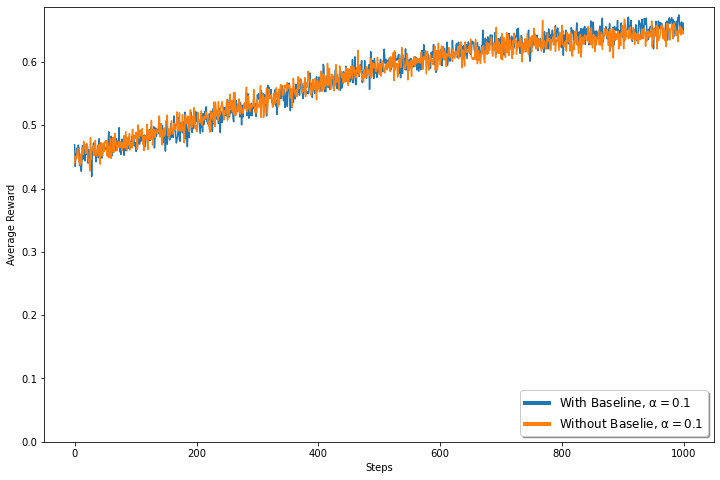

In [15]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_01, label =r'With Baseline, $\mathrm{\alpha}=0.1$')
plt.plot(average_reward_02, label =r'Without Baselie, $\mathrm{\alpha}=0.1$') 
plt.xlabel("Steps")
plt.ylabel("Average Reward")
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)

(0.0, 100.0)

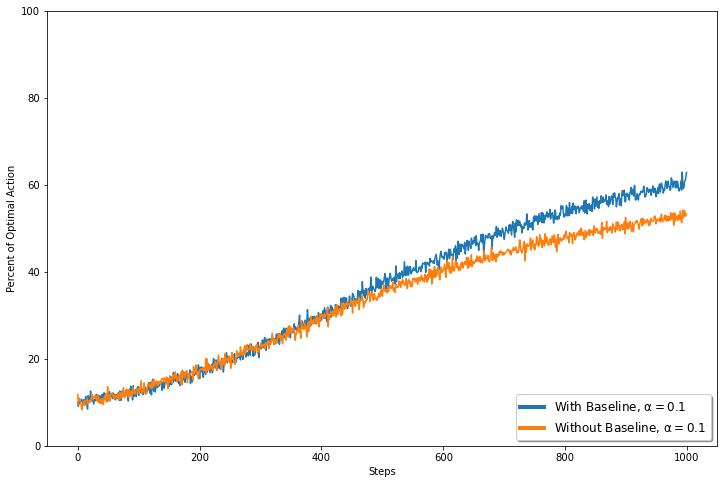

In [16]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_01, label =r'With Baseline, $\mathrm{\alpha=0.1}$') 
plt.plot(100*best_action_02, label =r'Without Baseline, $\mathrm{\alpha=0.1}$') 
plt.xlabel("Steps")
plt.ylabel("Percent of Optimal Action")
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0, ymax=100)